In [2]:
#%matplotlib ipymbl
%matplotlib inline

# PINN-based Schrodinger-Newton Equation Solver - Demo Notebook

## Theory
The Schrodinger-Newtonian (SN) Equation:
$$ \bigg[-\frac{\hbar^2}{2m}\nabla^2 + V(x) + m\Phi_{self}\bigg]\psi = i\hbar \frac{\partial \psi}{\partial t}, \quad \text{where  }\nabla^2\Phi_{self} = 4\pi Gm|\psi|^2
$$
is a non-linear 2nd order partial differential equation where analytical solutions are often hard to obtain. Therefore, using PINN, we formed a numercial solver.

## Importing Libraries

In [3]:
# --- Imports ---
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from IPython.display import Image, display

# Add parent directory to Python path so SNSolver.py can be imported
sys.path.append(os.path.abspath(".."))

# Import solver and helper
from SNSolver import SNSolver

## Help Function
To understand how the function work, we can simply call `SNSolver.help()` and you will receive an instruction how to call the function with the right arguments, as shown below:

In [4]:
#Calling The Help Function
SNSolver.help()


SNSolver.help()

Solves the time-dependent Schrödinger–Newton equation using a PINN.

Arguments:
  psi0_func : callable - Initial wavefunction ψ(x,0)
  V_func : callable, optional - External potential V(x,t)
  enable_SN : bool - Enable Schrödinger–Newton coupling
  enforce_norm : bool - Enforce normalization ∫|ψ|²dx=1
  bc_type : str - Boundary condition type
  x_range, t_range : tuple - Domain ranges
  nx, nt : int - Grid points
  hidden_dim, hidden_layers : int - Neural network size
  activation : str - Activation
  optimizer_type : str - 'adam' or 'sgd'
  lr : float - Learning rate
  epochs : int - Number of epochs
  hbar, G, m : float - Physical constants
  lambda_SN, lambda_PEq, lambda_IC, lambda_norm : float - Loss weights
  loss_tol : float - Early stopping
  show_plot, save_plot, save_gif, save_data, save_model : bool - Output control
  grid_plot : bool - Show grid subplot figure
  grid_cols : int - Columns in multi-grid
  grid_cell_size : tuple - Subplot size
  xlim, ylim: tu

## Calling SNSolver

Here we define an initial condition (IC) for time $t = 0$ and we have now chosen the example where:
$$
\psi_0(x) = \psi(x,0) = \frac{1}{\sqrt[4]{\pi}} e^{-x^2/2}
$$
which is a classic Gaussian wavepacket of width 1.

Then we call the function in accordance the arguments as defined/shown via the help function `SNSolver.help()`

In [6]:
# -------------------------------
# 1. Define initial wavefunction
# -------------------------------
def psi0(x):
    """Gaussian initial wavefunction ψ(x,0)."""
    return (1/np.pi)**0.25 * np.exp(-x**2)

# -------------------------------
# 2. Optional external potential
# -------------------------------
def V_ext(x, t):
    """Harmonic oscillator potential V(x,t) = 0.5 * x^2."""
    return 0.5 * x**2

# -------------------------------
# 3. Initialize SNSolver
# -------------------------------
solver = SNSolver(
    psi0_func=psi0,
    V_func=None,
    enable_SN=True,
    enforce_norm=True,
    x_range=(-10, 10),
    t_range=(0, 10),
    nx=250,
    nt=100,
    hidden_dim=32,
    hidden_layers=3,
    activation="tanh",
    optimizer_type="adam",
    lr=1e-3,
    epochs=2000,
    hbar=1,
    G=1,
    m=1,
    lambda_SN=0.5,
    lambda_PEq=0.5,
    lambda_IC=1.0,
    lambda_norm=0.5,
    loss_tol=None,
    show_plot=True,
    save_plot=True,
    save_gif=True,
    save_data=True,
    save_model=False,
    grid_plot=True,
    grid_cols=4,
    grid_cell_size=(6, 4),
    xlim = (-3,3),
    ylim = (0,0.7),
    output_dir="Demo Results",
    seed=123,
    device="mps"
)

# -------------------------------
# 4. Run solver
# -------------------------------
psi_model, loss_history, runtime_history = solver.run()

# -------------------------------
# 5. Summary
# -------------------------------
print("Final loss:", loss_history[-1])
print("Total runtime (s):", sum(runtime_history))
print(f"Results saved in folder: {solver.output_dir}")

Training PINN:   0%|                       | 4/2000 [00:00<04:58,  6.68 epoch/s]

Epoch 0: Loss=7.286979e-02


Training PINN:  10%|██▏                  | 205/2000 [00:08<01:06, 26.85 epoch/s]

Epoch 200: Loss=3.407540e-03


Training PINN:  20%|████▎                | 406/2000 [00:15<00:56, 28.43 epoch/s]

Epoch 400: Loss=2.604260e-03


Training PINN:  30%|██████▎              | 604/2000 [00:22<00:48, 28.73 epoch/s]

Epoch 600: Loss=2.060876e-03


Training PINN:  40%|████████▍            | 805/2000 [00:29<00:40, 29.17 epoch/s]

Epoch 800: Loss=1.811835e-03


Training PINN:  50%|██████████          | 1006/2000 [00:36<00:34, 28.89 epoch/s]

Epoch 1000: Loss=1.697947e-03


Training PINN:  60%|████████████        | 1204/2000 [00:42<00:27, 29.05 epoch/s]

Epoch 1200: Loss=1.699813e-03


Training PINN:  70%|██████████████      | 1405/2000 [00:49<00:20, 28.51 epoch/s]

Epoch 1400: Loss=1.546504e-03


Training PINN:  80%|████████████████    | 1606/2000 [00:56<00:13, 29.01 epoch/s]

Epoch 1600: Loss=1.471634e-03


Training PINN:  90%|██████████████████  | 1804/2000 [01:03<00:06, 28.83 epoch/s]

Epoch 1800: Loss=1.392860e-03


Training PINN: 100%|████████████████████| 2000/2000 [01:10<00:00, 28.29 epoch/s]


Epoch 1999: Loss=1.342487e-03
Final data saved to: Demo Results/20251105_100243/psi_xt.dat
Multi-column epoch grid saved to: Demo Results/20251105_100243/grid_plot.png
GIF saved to: Demo Results/20251105_100243/evolution.gif
Final loss: 0.0013424865901470184
Total runtime (s): 70.42046618461609
Results saved in folder: Demo Results/20251105_100243


## Viewing Data
Suppose you have saved your data, then you should be able to access  it under the file as defined in the argument `output_dir`. Therefore, we can simply call it as follows:

In [7]:
def view_data(show=True, output_dir="Results", filename="psi_xt.dat"):
    """
    View the saved data file from a run.

    Args:
        show (bool): If True, prints the file contents.
        output_dir (str): Base directory where timestamped run folders are saved.
        filename (str): Name of the data file to read.
    """
    # Find the latest timestamped folder
    if not os.path.exists(output_dir):
        print(f"No output directory found at '{output_dir}'")
        return

    # Get all subdirectories with timestamps
    subdirs = [d for d in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, d))]
    if not subdirs:
        print(f"No timestamped run folders found in '{output_dir}'")
        return

    # Sort folders by timestamp (latest first)
    latest_folder = sorted(subdirs, reverse=True)[0]
    filepath = os.path.join(output_dir, latest_folder, filename)

    if not os.path.exists(filepath):
        print(f"File '{filename}' not found in '{latest_folder}'")
        return

    if show:
        with open(filepath, "r") as f:
            print(f.read())

    return filepath  # also return the path in case user wants to load programmatically


# Example usage
view_data(show=True, output_dir="Demo Results")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



'Demo Results/20251105_100243/psi_xt.dat'

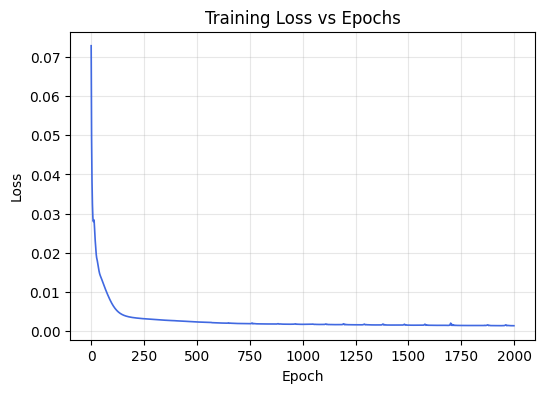

Displaying snapshot grid from: Demo Results/20251105_100243/grid_plot.png


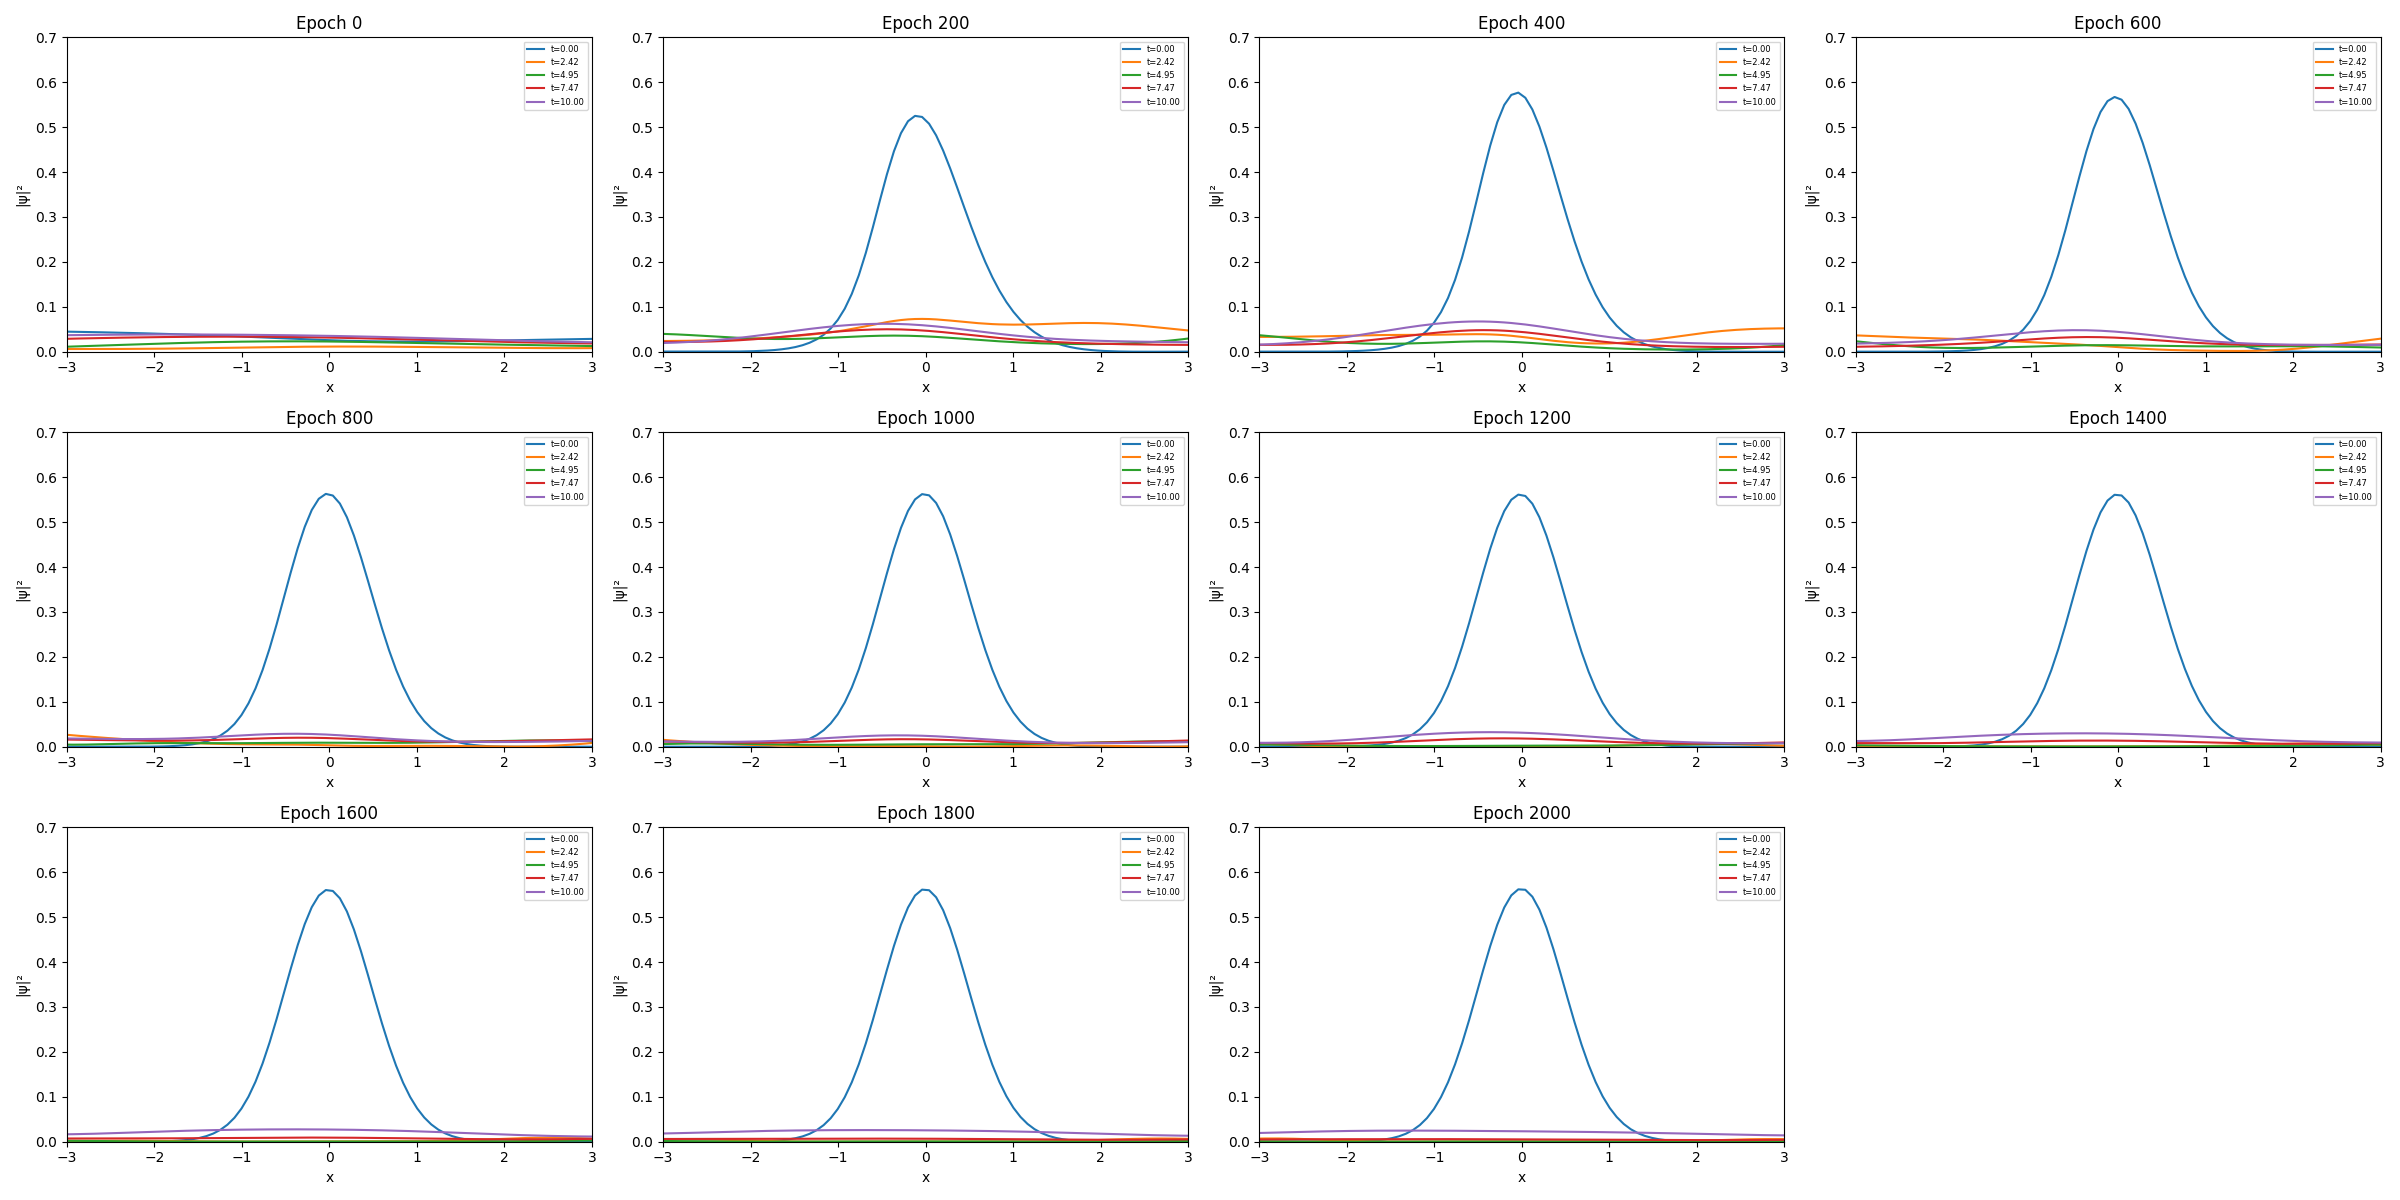

In [8]:
# --- View All Plots ---
def view_plots(output_dir="Results", loss_history=None, show_loss=True, show_snapshots=True):
    """
    Displays all generated plots from SNSolver outputs.
    
    Parameters
    ----------
    output_dir : str
        Base output directory containing timestamped run folders.
    loss_history : list or np.array, optional
        Loss values per epoch (returned from solver.run()).
    show_loss : bool
        Whether to plot the training loss curve.
    show_snapshots : bool
        Whether to display the |ψ(x,t)|² snapshot grid.
    """

    # --- Find latest timestamped folder ---
    if not os.path.exists(output_dir):
        print(f"Output directory '{output_dir}' not found.")
        return
    runs = sorted([d for d in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, d))])
    if not runs:
        print(f"No timestamped run folders found in '{output_dir}'.")
        return
    latest_run = os.path.join(output_dir, runs[-1])

    # --- Loss curve ---
    if show_loss and loss_history is not None:
        plt.figure(figsize=(6, 4))
        plt.plot(np.arange(len(loss_history)), loss_history, lw=1.2, color='royalblue')
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss vs Epochs")
        plt.grid(alpha=0.3)
        plt.show()
    elif show_loss:
        print("Loss history not provided. Cannot display loss curve.")

    # --- |ψ|² snapshot grid ---
    if show_snapshots:
        # Grid snapshot is expected inside the timestamped folder
        snapshot_path = os.path.join(latest_run, "grid_plot.png")
        if os.path.exists(snapshot_path):
            print(f"Displaying snapshot grid from: {snapshot_path}")
            display(Image(snapshot_path))
        else:
            # Check if any individual PNGs exist in the folder as fallback
            png_files = sorted([f for f in os.listdir(latest_run) if f.endswith(".png")])
            if png_files:
                print(f"No grid_plot.png found. Displaying first available snapshot: {png_files[0]}")
                display(Image(os.path.join(latest_run, png_files[0])))
            else:
                print("No snapshot images found — ensure grid_plot=True when running SNSolver.")

view_plots(output_dir="Demo Results", loss_history=loss_history)
